# Computer Sciences for Physics and Chemistry – Homework
**Group Members:** *Nijat Hamidov, Nijat Aghali, Narmin Pashayeva*, UFAZ L3 CS-19

## Abstract

In this exercise, we will be studying the kinetics of a chemical reaction. Specifically, we will be looking at the esterification of ethanoic acid (also known as acetic acid) with propanol. This reaction is considered to be a non-reversible first-order reaction, which means that the rate of the reaction is determined by the concentration of the reactants. The rate of the reaction is given by the equation: $v = k * [EA] * [Pr]$, where $[EA]$ is the concentration of ethanoic acid and $[Pr]$ is the concentration of propanol. The evolution of the concentrations of the reactants and the concentration of the product (propyl-ethanoate) during the reaction is described by three differential equations: $d[EA]/dt = -v$, $d[Pr]/dt = -v$, and $d[PE]/dt = +v$. The goal of the exercise is to use a series of NMR spectra, which are measurements taken every 15 minutes during the reaction, to estimate the value of the rate constant ($k$).

## Provided Dataset


The file you are provided with is a *.dat* file which can be imported on Python using *load()* function from *Pickle* module. The Dataset consists of a dictionary which contains the following information:
- Title of the dataset (string)
- The frequency shift corresponding to the first value in NMR spectrums (float), the last value in NMR spectrums (float) and the step value in NMR spectrums (float). These values can be used to calculate the x-axis of a spectrum
- A dictionary giving the NMR spectrum, i.e. y-axis values of:
 + A 1 μmol/L solution of ethanoic acid (float array)
 + A 1 μmol/L solution of propanol (float array)
 + A 1 μmol/L solution of propyl-ethanoate (float array)

- A table which contains NMR spectrum measured during the reaction process. Each element of the table is a dictionary that contains:
 + The time in hour at which the measurement is performed (float)
 + The measured NMR spectrum (float array)

## Exercises

### **EX1:** *Plot the NMR spectrum of ethanoic acid, propanol and propyl-ethanoate.*

The code you provided will import the *.dat* file using the `pickle.load()` function, and it will store the data in a dictionary called `data`. 

In [1]:
import pickle

# Load the .dat file using the pickle.load() function
with open("Homework_L3_2022.dat", "rb") as f:
    data = pickle.load(f)

This code will plot the NMR spectra of ethanoic acid, propanol, and propyl-ethanoate on separate subplots, and it will also plot all three spectra on the same subplot with a legend. The x-axis values of the spectra are calculated using the frequency shift values, and the y-axis values are the intensities of the signals at each frequency shift. The `plt.tight_layout()` function is used to adjust the spacing between the subplots to make sure that the titles and labels of each subplot are not overlapping. Finally, the `plt.show()` function is used to display the figure.


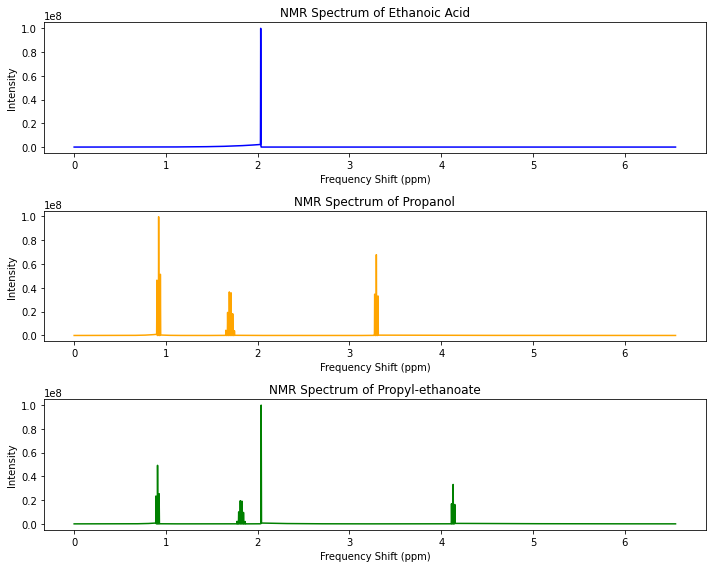

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Get the spectra data
ea_spectrum = data["Pure Spectrums"]["Acetic Acid"]
pr_spectrum = data["Pure Spectrums"]["Propanol"]
pe_spectrum = data["Pure Spectrums"]["Propylacetate"]

# Get the frequency shift values
freq_min = data["Frequency Min"]
freq_max = data["Frequency Max"]
freq_step = data["Frequency Step"]

# Calculate the x-axis values for the spectra
num_points = ea_spectrum.shape[0] # alternative to len(ea_spectrum)
x_values = np.linspace(freq_min, freq_max, num_points)

# Set up the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Plot the ethanoic acid spectrum
ax1.plot(x_values, ea_spectrum, color='blue')
ax1.set_xlabel('Frequency Shift (ppm)')
ax1.set_ylabel('Intensity')
ax1.set_title('NMR Spectrum of Ethanoic Acid')

# Plot the propanol spectrum
ax2.plot(x_values, pr_spectrum, color='orange')
ax2.set_xlabel('Frequency Shift (ppm)')
ax2.set_ylabel('Intensity')
ax2.set_title('NMR Spectrum of Propanol')

# Plot the propyl-ethanoate spectrum
ax3.plot(x_values, pe_spectrum, color='green')
ax3.set_xlabel('Frequency Shift (ppm)')
ax3.set_ylabel('Intensity')
ax3.set_title('NMR Spectrum of Propyl-ethanoate')

plt.tight_layout()
plt.show()

### **EX2** *Write a function that calculates the position and the intensity of each peak in a NMR spectrum. Apply it to ethanoic acid, propanol and propyl-ethanoate.*

The calculate_peaks function is a utility function that takes an NMR spectrum as input and returns an array of tuples, where each tuple contains the position and intensity of a peak in the spectrum.

The function uses the find_peaks function from the scipy.signal module to find the indices of the peaks in the spectrum. The height parameter specifies the minimum height of the peaks to be detected.

Then, the intensities of the peaks are calculated by accessing the corresponding values in the spectrum array using the indices returned by find_peaks.

Finally, the positions and intensities are combined into an array of tuples where we store *position* (labeled `'pos'`) and *intensity* (labeled `'intensity'`) of the peaks at indexes *0* and *1*, respectively.

In [3]:
from scipy.signal import find_peaks
import numpy as np
def calculate_peaks(spectrum):
    """
    Calculates the position and intensity of each peak in an NMR spectrum.
    
    Parameters:
    spectrum (array): The NMR spectrum to process.
    
    Returns:
    peaks (array): An array of tuples, where each tuple contains the position and intensity of a peak.
    """

    # Find peaks inside a signal based on peak properties.
    pos, properties = find_peaks(spectrum, height=0)

    # Combine the positions and intensities into an array of tuples
    peaks = np.array([(i, spectrum[i]) for i in pos], dtype=[('pos', 'int32'), ('intensity', 'float64')])

    return peaks

In [4]:
# Calculate the peaks for each spectrum
ea_pure_peaks = calculate_peaks(ea_spectrum)
pr_pure_peaks = calculate_peaks(pr_spectrum)
pe_pure_peaks = calculate_peaks(pe_spectrum)

In [5]:
# Print the peaks for each spectrum
print("Ethanoic Acid Peaks:", ea_pure_peaks)

Ethanoic Acid Peaks: [(20330, 99871694.67365436)]


In [6]:
print("Propanol Peaks:", pr_pure_peaks)

Propanol Peaks: [( 9018, 4.64794513e+07) ( 9208, 9.97783359e+07) ( 9397, 5.14254624e+07)
 (16488, 1.32080862e+02) (16539, 4.38084712e+06) (16724, 1.93630854e+07)
 (16910, 3.65813752e+07) (17095, 3.58540920e+07) (17280, 1.82356373e+07)
 (17466, 3.96667229e+06) (32751, 3.47332048e+07) (32931, 6.79056593e+07)
 (33111, 3.31994022e+07)]


In [7]:
print("Propyl-ethanoate Peaks:", pe_pure_peaks)

Propyl-ethanoate Peaks: [( 8916, 2.34685449e+07) ( 9088, 4.92837336e+07) ( 9261, 2.53394566e+07)
 (17755, 2.13942337e+06) (17930, 1.00693938e+07) (18105, 1.94634544e+07)
 (18279, 1.91673229e+07) (18454, 9.61316317e+06) (18628, 1.97276093e+06)
 (20380, 9.99683170e+07) (41075, 1.11272790e+03) (41123, 1.68810105e+07)
 (41300, 3.31784663e+07) (41479, 1.63295242e+07)]


### **EX3** *From the initial spectrum (at t=0), estimate the initial concentration of ethanoic acid, propanol and propyl-ethanoate.*


By summing the intensities of the peaks in the mixture spectrum at corresponding frequencies for each compound and normalizing it by the sum of the intensities of the peaks in the pure spectra, we can obtain the relative concentrations of the reactants and product in the mixture. This can be done for each time point, allowing us to track the evolution of the concentrations of the reactants and product during the reaction which is done in EX4.

In [8]:
def estimate_concentration(mixture_spectrum_at_t, pure_spectrum_peaks):
    """
    Estimates the concentration of a compound in a mixture based on the NMR spectrum of the mixture and the NMR spectrum of the pure compound.
    
    Parameters
    ----------
    mixture_spectrum_at_t : numpy array
        The NMR spectrum of the mixture at a given time.
    pure_spectrum_peaks : numpy array of tuples
        An array containing the positions and intensities of the peaks in the NMR spectrum of the pure compound.
    
    Returns
    -------
    float
        The concentration of the compound in the mixture in units of μmol/L.
    """
    # Sum the intensities of the peaks in the mixture spectrum that correspond to the compound of interest
    compound_in_mixture_intensities = np.sum(mixture_spectrum_at_t[pure_spectrum_peaks['pos']])

    # Sum the intensities of the peaks in the pure compound's NMR spectrum
    pure_compound_intensities = np.sum(pure_spectrum_peaks['intensity'])

    # Calculate the ratio of the intensities of the compound in the mixture and the pure compound
    compound_C_ratio = compound_in_mixture_intensities / pure_compound_intensities
    
    # Convert the ratio to an absolute concentration in units of μmol/L
    # The concentration of the pure compound at each peak is 1.0e-6 μmol/L
    compound_C = compound_C_ratio * 1e-6

    return compound_C

In [9]:
# Extract the NMR spectrum at t=0
initial_spectrum = data["Measurements"][0]["Data"]

In [10]:
# Estimate the initial concentration of EA, PR and PE at t=0
ea_initial_C = estimate_concentration(initial_spectrum, ea_pure_peaks)
pr_initial_C = estimate_concentration(initial_spectrum, pr_pure_peaks)
pe_initial_C = estimate_concentration(initial_spectrum, pe_pure_peaks)

In [11]:

print("Initial concentration of ethanoic acid:", ea_initial_C, "μmol/L")
print("Initial concentration of propanol:", pr_initial_C, "μmol/L")
print("Initial concentration of propyl-ethanoate:", pe_initial_C, "μmol/L")

Initial concentration of ethanoic acid: 2.0009761677951747e-05 μmol/L
Initial concentration of propanol: 5.024466168408439e-05 μmol/L
Initial concentration of propyl-ethanoate: 7.297250284764457e-07 μmol/L


### **EX4:** *Analyze the NMR spectrums to plot the evolution of the concentration of ethanoic acid, propanol and propyl-ethanoate during the reaction.*


In order to get evolution of concentrations for each compound we loop through the measurement data in the `data` dictionary and estimate the concentrations of ethanoic acid, propanol, and propyl-ethanoate at each time point using the `estimate_concentration()` function. Then, we store the estimated concentrations and the corresponding times in separate lists.

Finally, the evolution of each compound's concentration on its own subplot, as well as all three compounds on the same subplot.

In [12]:
# Initialize lists to store the concentration data
ea_concentrations = []
pr_concentrations = []
pe_concentrations = []
times = []


# Loop through the measurement data
for measurement in data['Measurements']:
    # Get the time and spectrum for the current measurement
    time = measurement['Time']
    mixture_spectrum_at_t = measurement['Data']
    
    # Estimate the concentrations of ethanoic acid, propanol, and propyl-ethanoate at the current time 
    ea_C = estimate_concentration(mixture_spectrum_at_t, ea_pure_peaks)
    pr_C = estimate_concentration(mixture_spectrum_at_t, pr_pure_peaks)
    pe_C = estimate_concentration(mixture_spectrum_at_t, pe_pure_peaks)

    # Add the data to the lists
    ea_concentrations.append(ea_C)
    pr_concentrations.append(pr_C)
    pe_concentrations.append(pe_C)
    times.append(time)

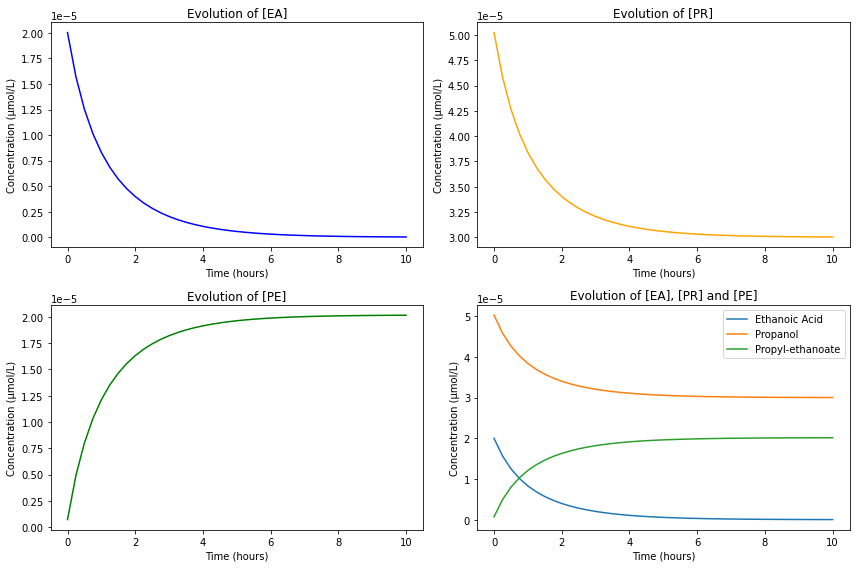

In [13]:
# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 8))

# Plot the [EA] evolution
ax1[0].plot(times, ea_concentrations, color='blue')
ax1[0].set_xlabel('Time (hours)')
ax1[0].set_ylabel('Concentration (μmol/L)')
ax1[0].set_title('Evolution of [EA]')

# Plot the [PR] evolution
ax1[1].plot(times, pr_concentrations, color='orange')
ax1[1].set_xlabel('Time (hours)')
ax1[1].set_ylabel('Concentration (μmol/L)')
ax1[1].set_title('Evolution of [PR]')

# Plot the [PE] evolution
ax2[0].plot(times, pe_concentrations, color='green')
ax2[0].set_xlabel('Time (hours)')
ax2[0].set_ylabel('Concentration (μmol/L)')
ax2[0].set_title('Evolution of [PE]')

# Plot all three concentration evolutions on the same graph
ax2[1].plot(times, ea_concentrations, label='Ethanoic Acid')
ax2[1].plot(times, pr_concentrations, label='Propanol')
ax2[1].plot(times, pe_concentrations, label='Propyl-ethanoate')
ax2[1].set_xlabel('Time (hours)')
ax2[1].set_ylabel('Concentration (μmol/L)')
ax2[1].set_title('Evolution of [EA], [PR] and [PE]')
ax2[1].legend()
plt.tight_layout()
plt.show()

### **EX5:** *From these data, estimate the value of the reaction constant k.*

Simple way to estimate k from the formula $d[EA]/dt = -k[EA][PR]$

In [14]:
# Calculate the derivative of the function
dEA_dt = np.gradient(ea_concentrations, times)

In [15]:
dEA_dt

array([-1.73271019e-05, -1.49797930e-05, -1.10757869e-05, -8.43606075e-06,
       -6.57118526e-06, -5.20820557e-06, -4.18487680e-06, -3.39971504e-06,
       -2.78653041e-06, -2.30061434e-06, -1.91085494e-06, -1.59504019e-06,
       -1.33695485e-06, -1.12452821e-06, -9.48619235e-07, -8.02199722e-07,
       -6.79792959e-07, -5.77080264e-07, -4.90620088e-07, -4.17644246e-07,
       -3.55907822e-07, -3.03577006e-07, -2.59144266e-07, -2.21363352e-07,
       -1.89198948e-07, -1.61787292e-07, -1.38405056e-07, -1.18444546e-07,
       -1.01393778e-07, -8.68203417e-08, -7.43582644e-08, -6.36972320e-08,
       -5.45737068e-08, -4.67635714e-08, -4.00760061e-08, -3.43483776e-08,
       -2.94419532e-08, -2.52383000e-08, -2.16362473e-08, -1.85493220e-08,
       -1.71246775e-08])

In [16]:
k_values = -dEA_dt / (np.array(ea_concentrations)*np.array(pr_concentrations))

In [17]:
k_values

array([17234.31735875, 20835.40091556, 20737.58340219, 20669.80033395,
       20619.32217528, 20578.99289924, 20544.47421374, 20512.94134871,
       20482.41628846, 20451.40688924, 20418.68962722, 20383.18161726,
       20343.85629088, 20299.68390524, 20249.58806217, 20192.41098456,
       20126.88467687, 20051.606922  , 19965.01821404, 19865.38226863,
       19750.77045138, 19619.04870357, 19467.87196191, 19294.68703987,
       19096.744039  , 18871.12393366, 18614.78316598, 18324.6202459 ,
       17997.56769586, 17630.71116755, 17221.43821692, 16767.61356159,
       16267.77509986, 15721.34139535, 15128.81383469, 14491.95404708,
       13813.91278313, 13099.28643705, 12354.08012932, 11585.56633687,
       11631.43396422])

In [18]:
k = np.mean(k_values)

In [19]:
k

18324.734209872702